In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "TATAPOWER.NS"
tataPower_data = yf.download(stock, start, end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed


In [4]:
tataPower_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
Date,,,,,,
2005-02-21,28.680359,39.551228,40.053036,39.300323,40.053036,7974562
2005-02-22,28.673359,39.541576,39.662205,39.227947,39.551228,7126785
2005-02-23,28.354961,39.102493,39.927586,38.948093,39.469200,9709516
2005-02-24,28.197510,38.885368,39.546402,38.774387,39.276199,9761909
2005-02-25,28.078554,38.721313,39.372700,38.595860,39.271374,5415530


In [5]:
tataPower_data.shape

(4938, 6)

In [6]:
tataPower_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
count,4938.000000,4938.000000,4938.000000,4938.000000,4938.000000,4.938000e+03
mean,105.897695,118.586586,120.600928,116.698901,118.795569,1.016855e+07
std,93.164084,89.997729,91.319534,88.845402,90.253291,1.763284e+07
min,23.201103,27.299999,28.600000,27.000000,27.250000,0.000000e+00
25%,58.072763,68.806259,70.150002,67.512501,68.902222,2.993488e+06
50%,72.303738,86.724998,88.199997,85.114510,86.851547,5.055327e+06
75%,99.393955,125.900963,127.759829,124.004707,125.934738,9.648035e+06
max,485.500000,485.500000,494.850006,479.399994,486.799988,3.606618e+08


In [7]:
tataPower_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4938 entries, 2005-02-21 to 2025-02-19
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (Adj Close, TATAPOWER.NS)  4938 non-null   float64
 1   (Close, TATAPOWER.NS)      4938 non-null   float64
 2   (High, TATAPOWER.NS)       4938 non-null   float64
 3   (Low, TATAPOWER.NS)        4938 non-null   float64
 4   (Open, TATAPOWER.NS)       4938 non-null   float64
 5   (Volume, TATAPOWER.NS)     4938 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 270.0 KB


In [9]:
tataPower_data.isna().sum()

Price      Ticker      
Adj Close  TATAPOWER.NS    0
Close      TATAPOWER.NS    0
High       TATAPOWER.NS    0
Low        TATAPOWER.NS    0
Open       TATAPOWER.NS    0
Volume     TATAPOWER.NS    0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of HDFC data')

<Figure size 1500x500 with 0 Axes>

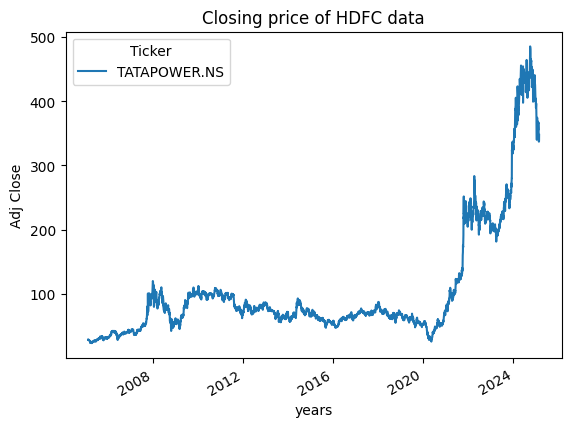

In [11]:
plt.figure(figsize = (15,5))
tataPower_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of HDFC data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Tata Power data")

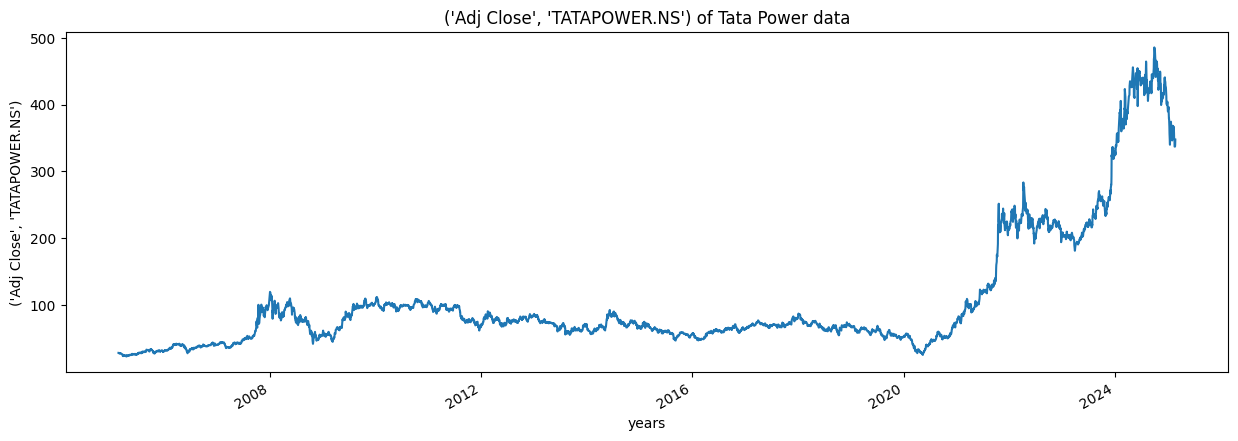

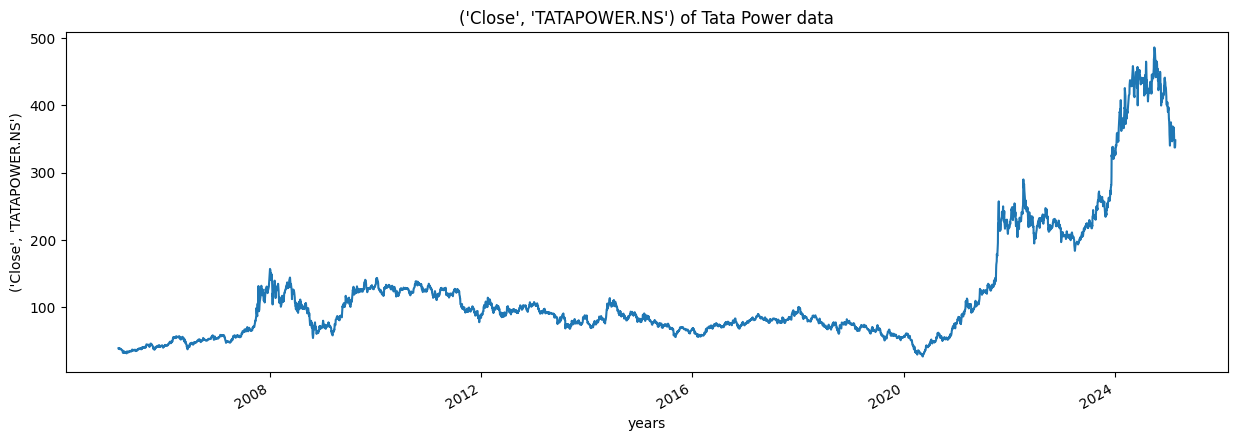

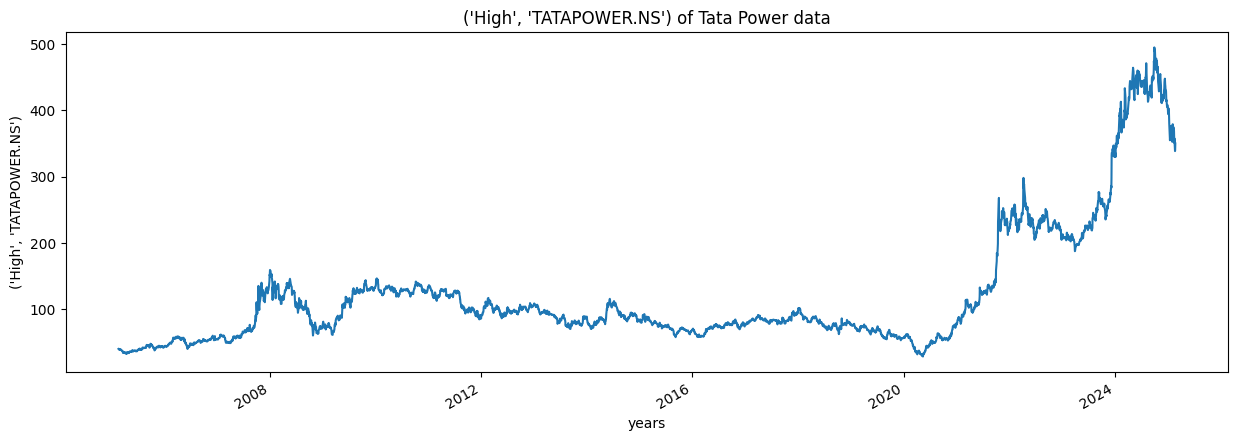

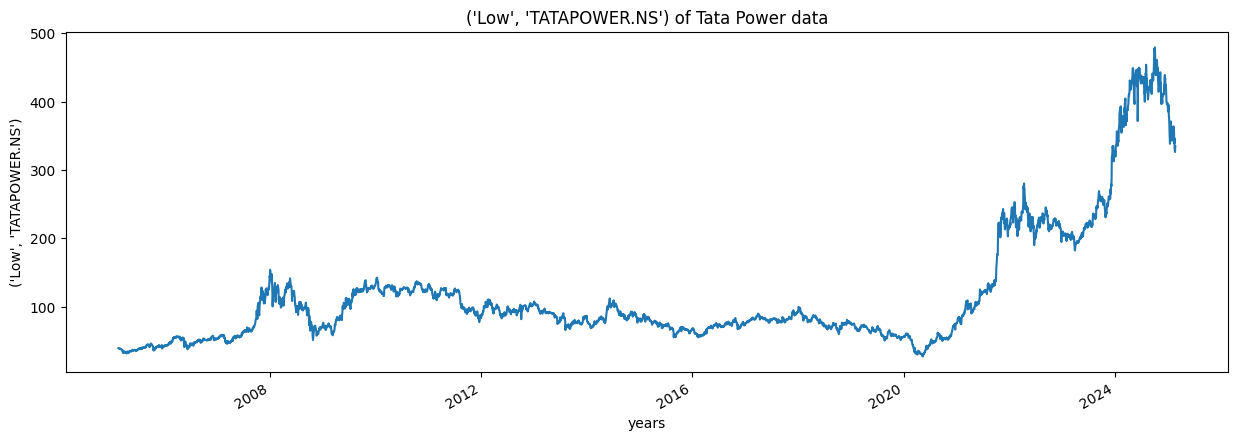

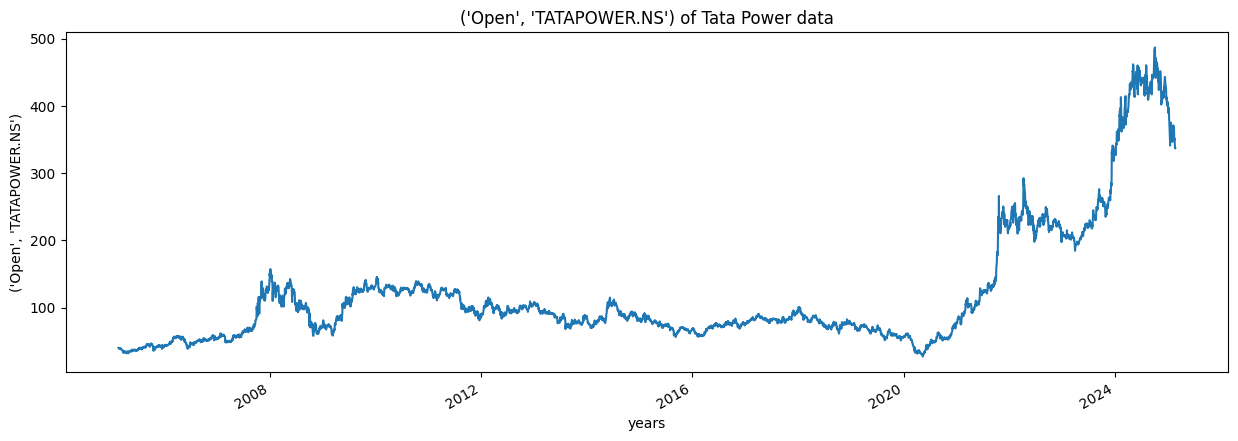

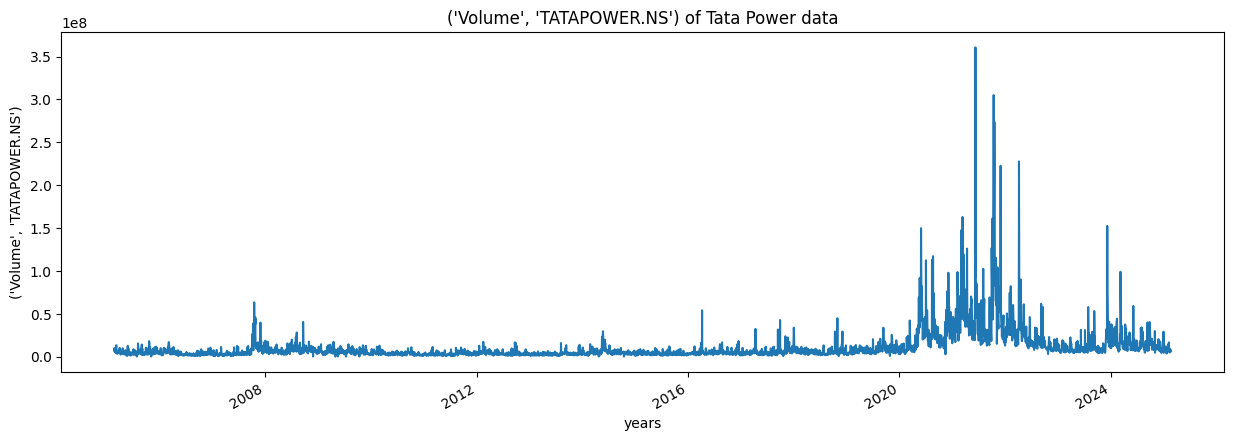

In [14]:
for column in tataPower_data.columns:
    plot_graph((15,5),tataPower_data[column], column)

In [15]:
for i in range(2004,2025):
    print(i,list(tataPower_data.index.year).count(i))

2004 0
2005 217
2006 247
2007 248
2008 246
2009 243
2010 250
2011 246
2012 245
2013 248
2014 244
2015 246
2016 246
2017 248
2018 246
2019 243
2020 251
2021 248
2022 248
2023 245
2024 246


In [16]:
tataPower_data['MA_for_250_days'] = tataPower_data['Adj Close'].rolling(250).mean()

In [17]:
tataPower_data['MA_for_250_days'][0:250].tail()

Date
2006-02-14         NaN
2006-02-15         NaN
2006-02-16         NaN
2006-02-17         NaN
2006-02-20    29.34311
Name: MA_for_250_days, dtype: float64

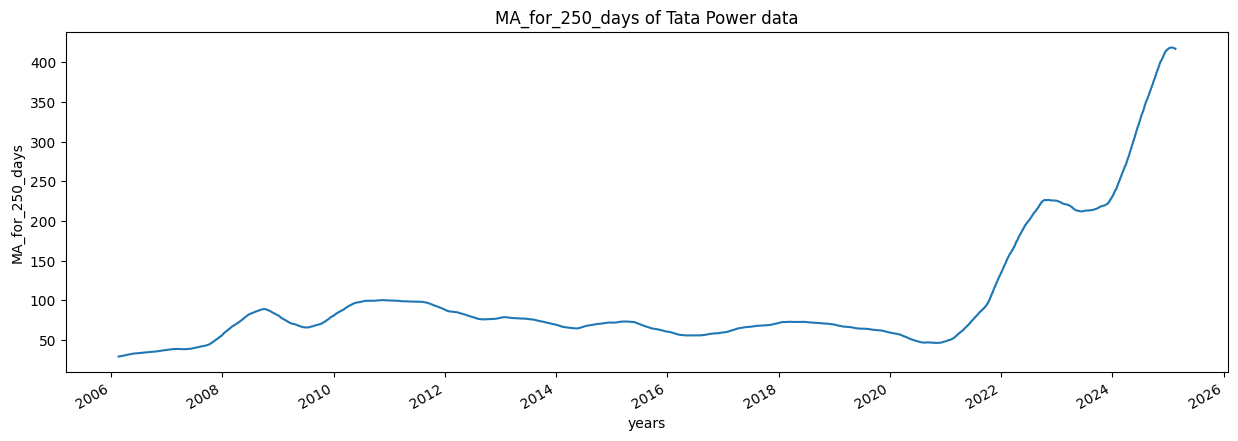

In [18]:
plot_graph((15,5), tataPower_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

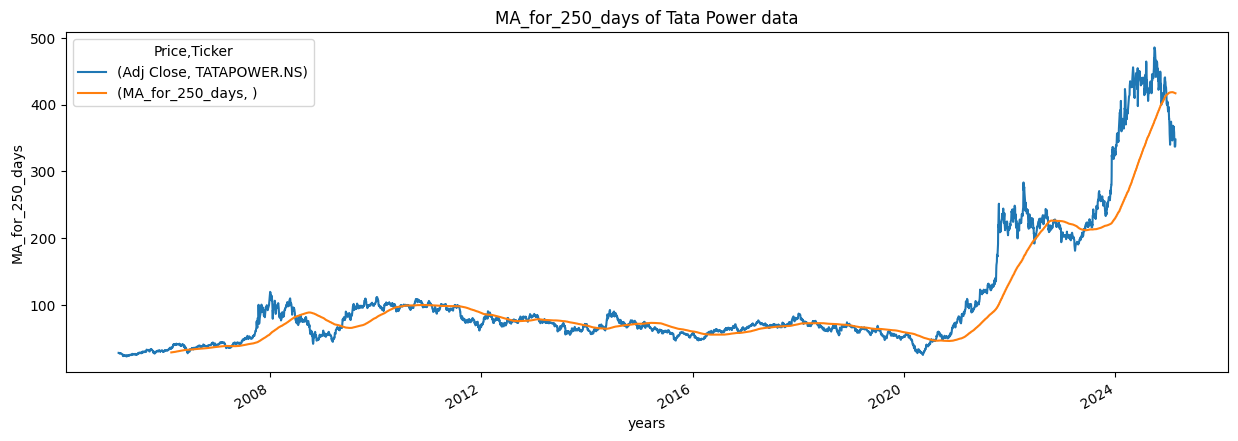

In [19]:
plot_graph((15,5), tataPower_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

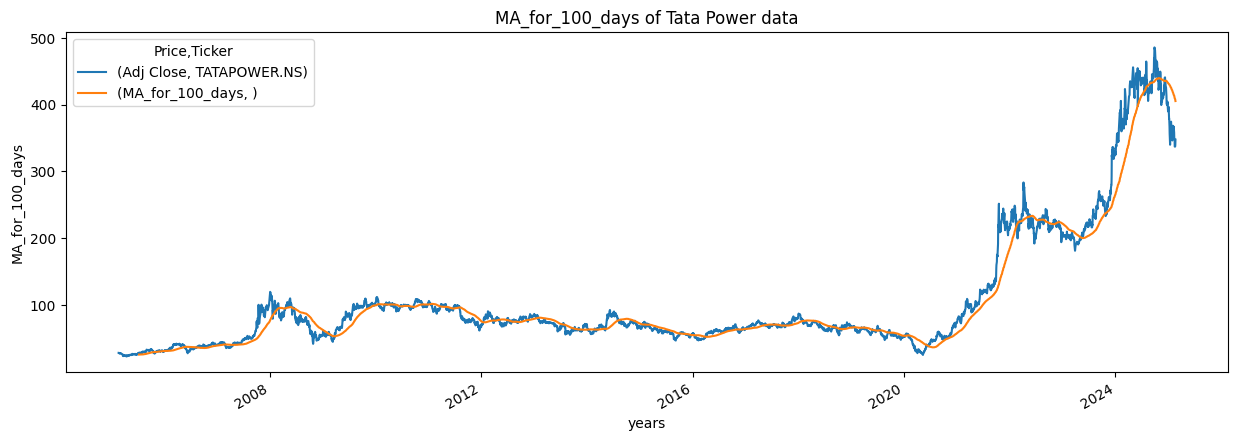

In [20]:
tataPower_data['MA_for_100_days'] = tataPower_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), tataPower_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

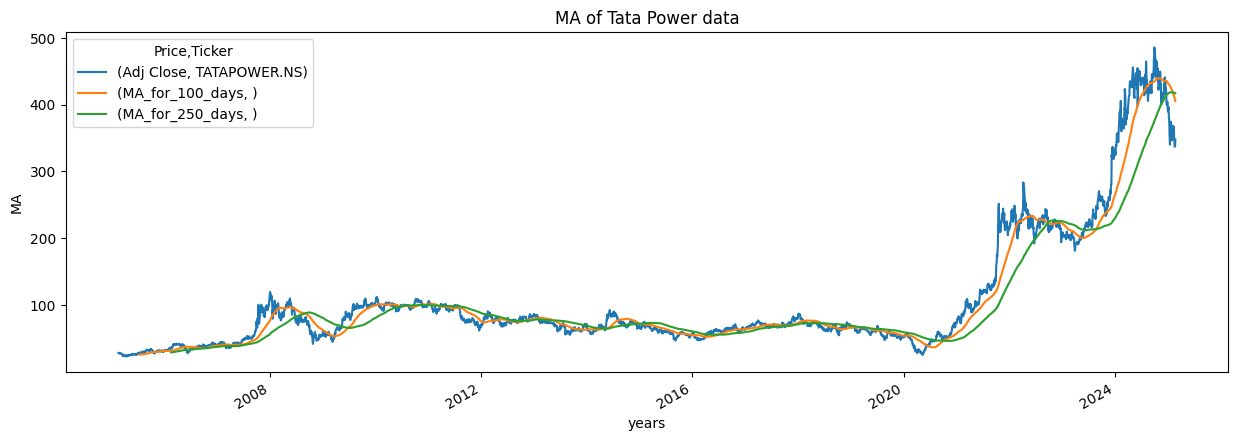

In [21]:
plot_graph((15,5), tataPower_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [22]:
tataPower_data['percentage_change_cp'] = tataPower_data['Adj Close'].pct_change()
tataPower_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,TATAPOWER.NS,
Date,,
2005-02-21,28.680359,NaN
2005-02-22,28.673359,-0.000244
2005-02-23,28.354961,-0.011104
2005-02-24,28.197510,-0.005553
2005-02-25,28.078554,-0.004219


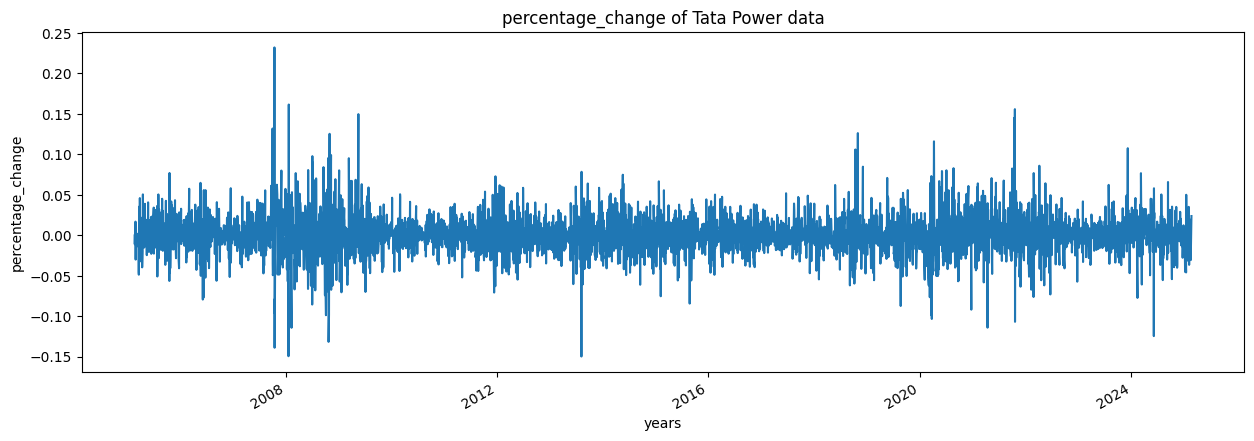

In [23]:
plot_graph((15,5), tataPower_data['percentage_change_cp'], 'percentage_change')

In [24]:
Adj_close_price = tataPower_data[['Adj Close']]

In [25]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([485.5]), array([23.20110321]))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01185219],
       [0.01183705],
       [0.01114832],
       ...,
       [0.67921189],
       [0.68440333],
       [0.70181628]])

In [27]:
len(scaled_data)

4938

In [28]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [29]:
x_data[0],y_data[0]

(array([[0.01185219],
        [0.01183705],
        [0.01114832],
        [0.01080774],
        [0.01055043],
        [0.01157216],
        [0.00971033],
        [0.00999793],
        [0.01090613],
        [0.0109137 ],
        [0.01054285],
        [0.01039147],
        [0.00961193],
        [0.00972545],
        [0.00933946],
        [0.0087037 ],
        [0.00790145],
        [0.00737921],
        [0.00715219],
        [0.0071976 ],
        [0.00684189],
        [0.00424591],
        [0.00158937],
        [0.00130178],
        [0.0031409 ],
        [0.00140017],
        [0.0037691 ],
        [0.00409453],
        [0.00463191],
        [0.00376152],
        [0.00228567],
        [0.00305007],
        [0.00230838],
        [0.00157424],
        [0.00140773],
        [0.00252028],
        [0.0031409 ],
        [0.00102175],
        [0.        ],
        [0.00077199],
        [0.00334526],
        [0.00464703],
        [0.00403399],
        [0.00378423],
        [0.00333769],
        [0

In [30]:
int(len(x_data)*0.7)

3386

In [31]:
4938-100-int(len(x_data)*0.7)

1452

In [32]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3386, 100, 1)
(3386, 1)
(1452, 100, 1)
(1452, 1)


In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [35]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\amjad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3386/3386 ━━━━━━━━━━━━━━━━━━━━ 192s 55ms/step - loss: 2.4862e-04
Epoch 2/2
3386/3386 ━━━━━━━━━━━━━━━━━━━━ 182s 54ms/step - loss: 4.7242e-05


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [39]:
predictions = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [40]:
predictions

array([[0.08705342],
       [0.08828536],
       [0.08536486],
       ...,
       [0.67553467],
       [0.67752695],
       [0.68145466]], dtype=float32)

In [41]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 63.4458  ],
       [ 64.01533 ],
       [ 62.665184],
       ...,
       [335.50006 ],
       [336.42108 ],
       [338.23685 ]], dtype=float32)

In [42]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 65.37355804],
       [ 63.84277344],
       [ 65.46360779],
       ...,
       [337.20001221],
       [339.6000061 ],
       [347.6499939 ]])

In [51]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape = mean_absolute_percentage_error(inv_y_test, inv_predictions) * 100

In [52]:
mape

np.float64(2.201849649592766)

In [53]:
r2 = r2_score(inv_y_test, inv_predictions)

In [54]:
r2

0.9980935953437516

In [56]:
accuracy = 100 - mape
print(f"Model Accuracy (MAPA): {accuracy:.2f}%")
print(f"R-squared (R²) Score: {r2:.4f}")

Model Accuracy (MAPA): 97.80%
R-squared (R²) Score: 0.9981


In [43]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [44]:
rmse

np.float64(5.696810201913063)

In [46]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = tataPower_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-04-09,65.373558,63.445801
2019-04-10,63.842773,64.015327
2019-04-11,65.463608,62.665184
2019-04-12,65.958855,64.111572
2019-04-15,64.247986,64.510582


<Figure size 640x480 with 0 Axes>

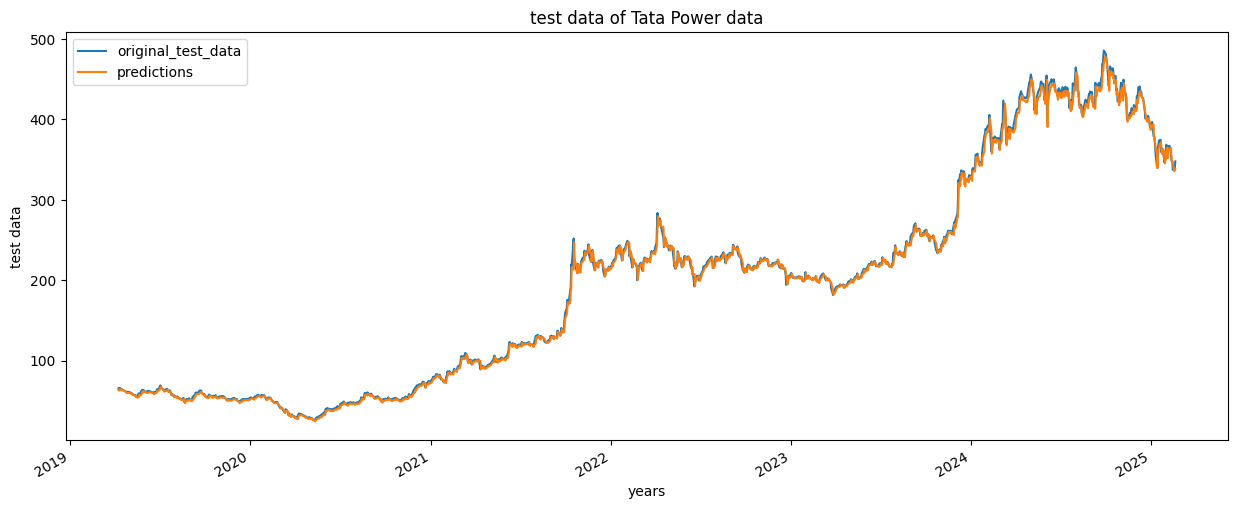

In [47]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

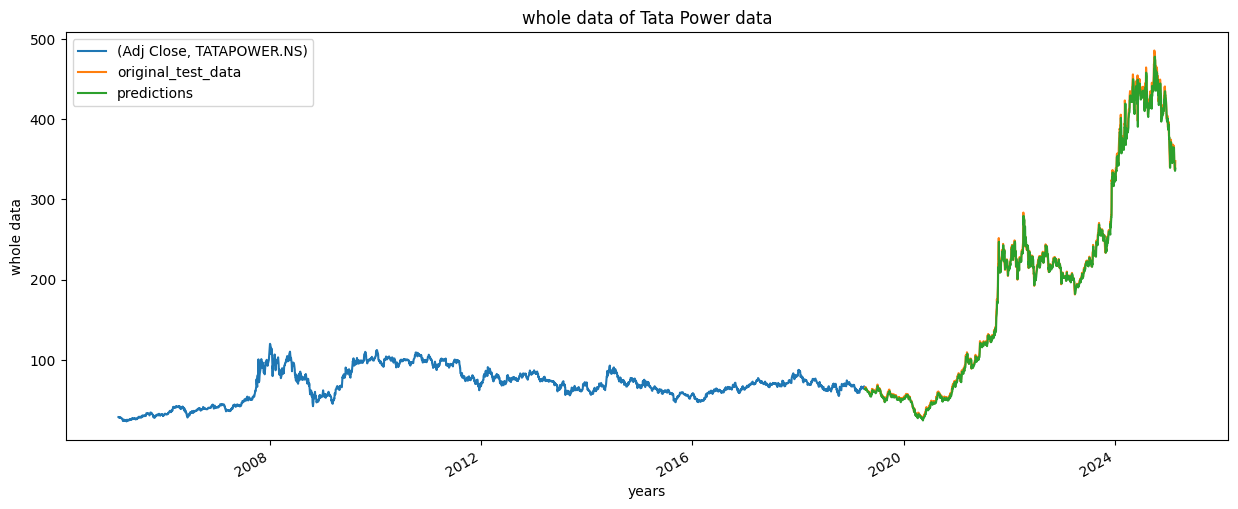

In [48]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [49]:
model.save("TataPower_stock_price_model.keras")